In [2]:
import numpy as np
import operator
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import operator
%matplotlib inline

In [3]:
import csv

main_movies = {}


with open('imdb_dataset_v7.2_6_actors_complete.tsv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter = "\t")
    for entry in reader:
        main_movies[
            entry["title"]
        ] = {
        "director":     entry["director"],
        "rating":       entry["rating"],
        "votes":        entry["votes"],
        "year":         entry["year"],
        "genre":        entry["genre"],
        "gross":        entry["gross"],
        "budget":       entry["budget"],
        "run-time":     entry["run-time"] ,
        "actor1":       entry["actor1"],
        "actor1_rank":  entry["actor1_rank"],
        "actor1_sex":   entry["actor1_sex"],
        "actor2":       entry["actor2"],
        "actor2_rank":  entry["actor2_rank"],
        "actor2_sex":   entry["actor2_sex"],
        "actor3":       entry["actor3"],
        "actor3_rank":  entry["actor3_rank"],
        "actor3_sex":   entry["actor3_sex"],
        "actor4":       entry["actor4"],
        "actor4_rank":  entry["actor4_rank"],
        "actor4_sex":   entry["actor4_sex"],
        "actor5":       entry["actor5"],
        "actor5_rank":  entry["actor5_rank"],
        "actor5_sex":   entry["actor5_sex"],
        "actor6":       entry["actor6"],
        "actor6_rank":  entry["actor6_rank"],
        "actor6_sex":   entry["actor6_sex"],
        "plot":         entry["plot"]
        }

In [4]:
for movie in main_movies.keys()[0:30]:
    print movie," director: ", main_movies[movie]["director"]

Fired Up! (2009)  director:  Will Gluck
Least Among Saints (2012)  director:  Martin Papazian
Drop Dead Gorgeous (1999)  director:  Michael Patrick Jann
Mozart and the Whale (2005)  director:  Petter Næss
The Peacemaker (1997)  director:  Mimi Leder
Holy Rollers (2010)  director:  Kevin Asch
X-Men: Days of Future Past (2014)  director:  Bryan Singer
Article 99 (1992)  director:  Howard Deutch
Frozen (2013/I)  director:  Chris (II) Buck
FernGully: The Last Rainforest (1992)  director:  Bill Kroyer
The Big Short (2015)  director:  Adam (I) McKay
The Covenant (2006)  director:  Renny Harlin
Glorious 39 (2009)  director:  Stephen (I) Poliakoff
Like Minds (2006)  director:  Gregory Read
Krampus (2015/I)  director:  Michael (II) Dougherty
Encino Man (1992)  director:  Les Mayfield
The Adventures of Baron Munchausen (1988)  director:  Terry Gilliam
An Unfinished Life (2005)  director:  Lasse Hallström
A Perfect World (1993)  director:  Clint Eastwood
Margin Call (2011)  director:  J.C. Chando

In [5]:
print len(main_movies)


4376


In [7]:
actors_network = nx.Graph()

for movie in main_movies:
    actors_network.add_node(main_movies[movie]["actor1"]) 
    actors_network.add_node(main_movies[movie]["actor2"]) 
    actors_network.add_node(main_movies[movie]["actor3"])
    actors_network.add_node(main_movies[movie]["actor4"])
    actors_network.add_node(main_movies[movie]["actor5"])
    actors_network.add_node(main_movies[movie]["actor6"])

for movie in main_movies:
    actors_network.add_edge(main_movies[movie]["actor1"], main_movies[movie]["actor2"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor1"], main_movies[movie]["actor3"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor1"], main_movies[movie]["actor4"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor1"], main_movies[movie]["actor5"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor1"], main_movies[movie]["actor6"], weight =0)
    
    actors_network.add_edge(main_movies[movie]["actor2"], main_movies[movie]["actor3"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor2"], main_movies[movie]["actor4"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor2"], main_movies[movie]["actor5"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor2"], main_movies[movie]["actor6"], weight =0)
    
    actors_network.add_edge(main_movies[movie]["actor3"], main_movies[movie]["actor4"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor3"], main_movies[movie]["actor5"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor3"], main_movies[movie]["actor6"], weight =0)
    
    actors_network.add_edge(main_movies[movie]["actor4"], main_movies[movie]["actor5"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor4"], main_movies[movie]["actor6"], weight =0)
    
    actors_network.add_edge(main_movies[movie]["actor5"], main_movies[movie]["actor6"], weight =0)
    
for movie in main_movies: 
    if actors_network.has_edge(main_movies[movie]["actor1"], main_movies[movie]["actor2"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor1"]][main_movies[movie]["actor2"]]['weight'] += 1               
    if actors_network.has_edge(main_movies[movie]["actor1"], main_movies[movie]["actor3"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor1"]][main_movies[movie]["actor3"]]['weight'] += 1
    if actors_network.has_edge(main_movies[movie]["actor1"], main_movies[movie]["actor4"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor1"]][main_movies[movie]["actor4"]]['weight'] += 1
    if actors_network.has_edge(main_movies[movie]["actor1"], main_movies[movie]["actor5"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor1"]][main_movies[movie]["actor5"]]['weight'] += 1
    if actors_network.has_edge(main_movies[movie]["actor1"], main_movies[movie]["actor6"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor1"]][main_movies[movie]["actor6"]]['weight'] += 1
                
                
    if actors_network.has_edge(main_movies[movie]["actor2"], main_movies[movie]["actor3"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor2"]][main_movies[movie]["actor3"]]['weight'] += 1                
    if actors_network.has_edge(main_movies[movie]["actor2"], main_movies[movie]["actor4"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor2"]][main_movies[movie]["actor4"]]['weight'] += 1
    if actors_network.has_edge(main_movies[movie]["actor2"], main_movies[movie]["actor5"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor2"]][main_movies[movie]["actor5"]]['weight'] += 1
    if actors_network.has_edge(main_movies[movie]["actor2"], main_movies[movie]["actor6"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor2"]][main_movies[movie]["actor6"]]['weight'] += 1
                
                
    if actors_network.has_edge(main_movies[movie]["actor3"], main_movies[movie]["actor4"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor3"]][main_movies[movie]["actor4"]]['weight'] += 1  
    if actors_network.has_edge(main_movies[movie]["actor3"], main_movies[movie]["actor5"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor3"]][main_movies[movie]["actor5"]]['weight'] += 1 
    if actors_network.has_edge(main_movies[movie]["actor3"], main_movies[movie]["actor6"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor3"]][main_movies[movie]["actor6"]]['weight'] += 1 
                
                
    if actors_network.has_edge(main_movies[movie]["actor4"], main_movies[movie]["actor5"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor4"]][main_movies[movie]["actor5"]]['weight'] += 1 
    if actors_network.has_edge(main_movies[movie]["actor4"], main_movies[movie]["actor6"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor4"]][main_movies[movie]["actor6"]]['weight'] += 1
                
    if actors_network.has_edge(main_movies[movie]["actor5"], main_movies[movie]["actor6"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor5"]][main_movies[movie]["actor6"]]['weight'] += 1 
                
num_of_nodes = actors_network.number_of_nodes()
print('Number of nodes: ' + str(num_of_nodes))

num_of_links = actors_network.number_of_edges()
print('Number of links: ' + str(num_of_links))

num_of_links_sorted = sorted(actors_network.edges(data=True), key=lambda (source,target,data): data['weight'], reverse=True)

#print "all edges"
#print sorted(actors_network.edges(data=True), key=lambda (source,target,data): data['weight'], reverse=True)

print ('\nMost frequent pairs of actors')
for ii in num_of_links_sorted[0:10]:
    print(ii[0] + ' and ' + str(ii[1]) +' '+ str(ii[2]))

Number of nodes: 4663
Number of links: 62192

Most frequent pairs of actors
Adam Sandler and Rob Schneider {'weight': 13}
Jim Cummings and Frank Welker {'weight': 8}
Kevin James and Adam Sandler {'weight': 8}
Daniel Radcliffe and Tom Felton {'weight': 8}
Adam Sandler and Steve Buscemi {'weight': 8}
John Cusack and Joan Cusack {'weight': 7}
Quentin Tarantino and Samuel L. Jackson {'weight': 6}
Johnny Depp and Helena Bonham Carter {'weight': 6}
George Clooney and Matt Damon {'weight': 6}
Matt Damon and Ben Affleck {'weight': 6}


EXPLANATION

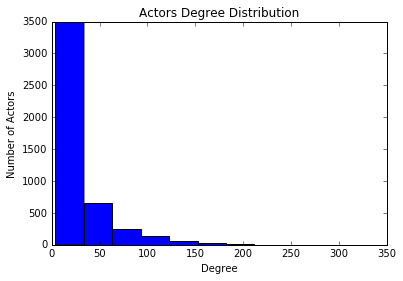

In [8]:
plt.hist(nx.degree(actors_network).values())
plt.title("Actors Degree Distribution")
plt.xlabel('Degree')
plt.ylabel('Number of Actors')
plt.show()
#plt.savefig('network_degree.png')


In [9]:
# Betweenness centrality for 'actors_network'
between_centrality = nx.betweenness_centrality(actors_network)

# Go through 'between_centrality' and add to two lists (names and values)
between_centrality_names = []
between_centrality_values = []
for i in between_centrality:
    between_centrality_names.append(i)
    between_centrality_values.append(between_centrality[i])
    
# Combining lists of names and values
between_centrality_list = zip(between_centrality_names, between_centrality_values)

# Sort by values
between_centrality_sorted = sorted(between_centrality_list, key=lambda tup: tup[1], reverse=True)

# Print the top 10
for ii in between_centrality_sorted[0:10]:
    print(ii[0] + ' with value of ' + str(ii[1]))

Samuel L. Jackson with value of 0.0190923378663
Bruce Willis with value of 0.0146317181357
Frank Welker with value of 0.0139737821041
Nicolas Cage with value of 0.0119755155006
Robert De Niro with value of 0.0115052284022
Robin Williams with value of 0.0111381386484
Morgan Freeman with value of 0.0100377194805
Liam Neeson with value of 0.00935405825492
John Goodman with value of 0.00884639332967
Christopher Walken with value of 0.00880429873827


EXPLANATION

In [11]:
#The most profitable actor1
most_profit_actor1 = defaultdict(float)
most_profit_actor1times = defaultdict(float)
for movie,val in main_movies.iteritems():
    most_profit_actor1[val['actor1']] += (float(val['gross'])-float(val['budget']))
    most_profit_actor1times[val['actor1']] += (float(val['gross'])/float(val['budget']))

    
sorted_dir_most_profit_actor1 = sorted(most_profit_actor1.items(), key=operator.itemgetter(1),reverse=True)
print "\nThe most profitable actor in lead role (money what their movie earned (gross)): \n"
for item in sorted_dir_most_profit_actor1[:10]:
    print item
    
sorted_dir_most_profit_actor1times = sorted(most_profit_actor1times.items(), key=operator.itemgetter(1),reverse=True)
print "\nThe most profitable actor in lead role (money what their movie earned (gross)): \n"
for item in sorted_dir_most_profit_actor1times[:10]:
    print item

sorted_dir_most_profit_actor1 = sorted(most_profit_actor1.items(), key=operator.itemgetter(1),reverse=False)
print "\nThe worst profitable actor in lead role (money what their movie earned (gross)): \n"
for item in sorted_dir_most_profit_actor1[:10]:
    print item
    
sorted_dir_most_profit_actor1times = sorted(most_profit_actor1times.items(), key=operator.itemgetter(1),reverse=False)
print "\nThe worst profitable actor in lead role (money what their movie earned (gross)): \n"
for item in sorted_dir_most_profit_actor1times[:10]:
    print item


The most profitable actor in lead role (money what their movie earned (gross)): 

('Tom Hanks', 6392085031.0)
('Tom Cruise', 5729453120.0)
('Johnny Depp', 5676303947.0)
('Bryce Dallas Howard', 4906554608.0)
('Kristen Wiig', 4246807116.0)
('Leonardo DiCaprio', 3934239916.0)
('Brad Pitt', 3763663463.0)
('Will Smith', 3608534445.0)
('Natalia Tena', 3592680831.0)
('Benedict Cumberbatch', 3386588388.0)

The most profitable actor in lead role (money what their movie earned (gross)): 

('Tom Cruise', 202.15386369045262)
('Ben Affleck', 175.95145193637504)
('Bruce Willis', 165.18379726825285)
('Tom Hanks', 148.5226723266886)
('Tina Majorino', 115.29365)
('Johnny Depp', 114.43104297805958)
('Brad Pitt', 102.27278072023974)
('Rose Byrne', 98.40631100238095)
('Cary Elwes', 96.222444075)
('Will Smith', 90.9397753972767)

The worst profitable actor in lead role (money what their movie earned (gross)): 

('Stephen Lang', -214079371.0)
('Claire Danes', -154167383.0)
('Antonio Banderas', -143670201.0

In [12]:
def actors_and_gross_for_all_their_movies(movies_data):
    all_actors_gross = defaultdict(float)
    all_actors_budget = defaultdict(float)
    all_actors_amount = defaultdict(int)

    for title in movies_data:
        movie_info = movies_data[title]
        gross = float(movie_info["gross"])
        budget = float(movie_info["budget"])

        actor = movie_info["actor1"]
        all_actors_gross[actor] += gross
        all_actors_budget[actor] += budget
        all_actors_amount[actor] += 1

        actor = movie_info["actor2"]
        all_actors_gross[actor] += gross
        all_actors_budget[actor] += budget
        all_actors_amount[actor] += 1
        
        actor = movie_info["actor3"]
        all_actors_gross[actor] += gross
        all_actors_budget[actor] += budget
        all_actors_amount[actor] += 1
        
        actor = movie_info["actor4"]
        all_actors_gross[actor] += gross
        all_actors_budget[actor] += budget
        all_actors_amount[actor] += 1
        
        actor = movie_info["actor5"]
        all_actors_gross[actor] += gross
        all_actors_budget[actor] += budget
        all_actors_amount[actor] += 1
        
        actor = movie_info["actor6"]
        all_actors_gross[actor] += gross
        all_actors_budget[actor] += budget
        all_actors_amount[actor] += 1
        
    return [
            all_actors_gross,
            all_actors_budget,
            all_actors_amount ]

result = actors_and_gross_for_all_their_movies(main_movies)

res_gross_dict = result[0]
res_budge_dict = result[1]
res_amount_dict = result[2]

for actor in res_gross_dict:
    print actor, res_gross_dict[actor]
    
res_gross = [(key, res_gross_dict[key]) for key in sorted(res_gross_dict.iterkeys())]

sorted(res_gross, key=lambda x: x[1], reverse=True)

Lily Tomlin 80103310.0
Norm MacDonald 62832640.0
James Norton 144548124.0
Burn Gorman 185500256.0
Rick Fox 8119205.0
Samuel Barnett 28203407.0
Lauren Hutton 3060858.0
Jacki Weaver 10333008.0
John Krasinski 2850190735.0
Maisie Williams 359082.0
Liev Schreiber 2498430539.0
Kristen Hager 470317746.0
Abbie Cobb 10429707.0
Ben Savage 8476761.0
H. Jon Benjamin 23216082.0
Sterling Jerins 16168833.0
Ryan Hansen 9626.0
James Le Gros 157839203.0
Ayelet Zurer 1463198557.0
Paul Wesley 375974243.0
Nick Swardson 97195607.0
Reba McEntire 54862673.0
Angourie Rice 166842493.0
Tyra Banks 28250704.0
Tiya Sircar 247580928.0
Suzanne Somers 7881335.0
Doug Bradley 35210191.0
Melina Kanakaredes 4530929.0
Luke Treadaway 161461330.0
Nathalie Emmanuel 312268954.0
Alex D. Linz 79082515.0
Tait Fletcher 192330738.0
Ari Graynor 635036.0
Jude Demorest 2436.0
Andrew Scott 55424988.0
Anna Silk 917587.0
Kellan Lutz 329796031.0
Julie Kavner 10453963.0
Rachel Boston 60722734.0
Werner Herzog 663722244.0
David Hyde Pierce 3

[('Samuel L. Jackson', 9736000323.0),
 ('Tom Hanks', 9507180098.0),
 ('Helena Bonham Carter', 9492434174.0),
 ('Gary Oldman', 9425369004.0),
 ('Johnny Depp', 9037079625.0),
 ('Tom Cruise', 8558921293.0),
 ('Cate Blanchett', 8410857412.0),
 ('Tom Felton', 8338091995.0),
 ('Alan Tudyk', 8308676142.0),
 ('Bruce Willis', 8300096050.0),
 ('Daniel Radcliffe', 8229164214.0),
 ('Liam Neeson', 8160868499.0),
 ('Morgan Freeman', 7975681363.0),
 ('Will Smith', 7759305347.0),
 ('Alan Rickman', 7385672375.0),
 ('Ralph Fiennes', 7334048809.0),
 ('J.K. Simmons', 7248036291.0),
 ('Cameron Diaz', 7129146189.0),
 ('Leonardo DiCaprio', 7024458942.0),
 ('Matt Damon', 6967028987.0),
 ('Hugh Jackman', 6909929561.0),
 ('Idris Elba', 6875132597.0),
 ('Daniel Craig', 6828439301.0),
 ('Sigourney Weaver', 6747966574.0),
 ('Ewan McGregor', 6734641795.0),
 ('Eddie Murphy', 6589340333.0),
 ('Hugo Weaving', 6575162296.0),
 ('Frank Welker', 6557658407.0),
 ('Ben Stiller', 6537088903.0),
 ('Brad Pitt', 6531486775.0),


In [13]:
# Eigenvector centrality
eigenvector_centrality_in = nx.eigenvector_centrality(actors_network)

# Go through 'eigenvector centrality_in' and add to two lists (names and values)
eigenvector_centrality_in_names = []
eigenvector_centrality_in_values = []
for i in eigenvector_centrality_in:
    eigenvector_centrality_in_names.append(i)
    eigenvector_centrality_in_values.append(eigenvector_centrality_in[i])
    
# Combining lists of names and values
eigenvector_centrality_in_list = zip(eigenvector_centrality_in_names, eigenvector_centrality_in_values)

# Sort by values
eigenvector_centrality_in_sorted = sorted(eigenvector_centrality_in_list, key=lambda tup: tup[1], reverse=True)

# Print the top 10
for ii in eigenvector_centrality_in_sorted[0:10]:
    print(ii[0] + ' with value of ' + str(ii[1]))

Samuel L. Jackson with value of 0.122408785363
Bruce Willis with value of 0.116849841518
Matt Damon with value of 0.104437895613
Robert De Niro with value of 0.101148460876
Morgan Freeman with value of 0.0980208625364
John Cusack with value of 0.0910546823135
Steve Buscemi with value of 0.0887923547864
Robin Williams with value of 0.0877423310874
Brad Pitt with value of 0.0841875498816
J.K. Simmons with value of 0.0827427545435


EXPLANATION

Number of nodes: 6448
Number of links: 24539

20 Directors with the greatest actors network:
Woody Allen with value of 146
Steven Spielberg with value of 109
Clint Eastwood with value of 105
Ridley Scott with value of 99
Ron (I) Howard with value of 95
Oliver (I) Stone with value of 84
Steven Soderbergh with value of 81
Barry (I) Levinson with value of 81
Renny Harlin with value of 78
Joel Schumacher with value of 77
Rob Reiner with value of 76
Spike Lee with value of 74
Tony (I) Scott with value of 69
Chris Columbus with value of 66
Stephen Herek with value of 66
Garry (I) Marshall with value of 65
Robert Zemeckis with value of 64
Tim (I) Burton with value of 64
Martin (I) Scorsese with value of 63
Ivan Reitman with value of 62


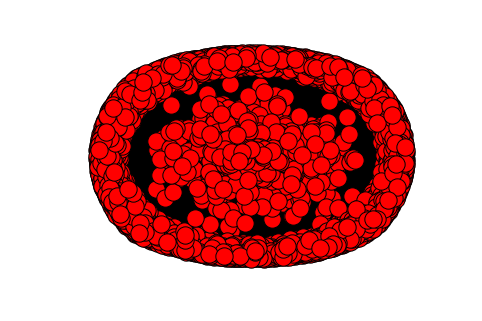

In [17]:
directors_network = nx.DiGraph()

for movie in main_movies:
    directors_network.add_node(main_movies[movie]["director"])

for movie in main_movies:
    directors_network.add_edge(main_movies[movie]["director"], main_movies[movie]["actor1"], weight =1)
    directors_network.add_edge(main_movies[movie]["director"], main_movies[movie]["actor2"], weight =1)
    directors_network.add_edge(main_movies[movie]["director"], main_movies[movie]["actor3"], weight =1)
    directors_network.add_edge(main_movies[movie]["director"], main_movies[movie]["actor4"], weight =1)
    directors_network.add_edge(main_movies[movie]["director"], main_movies[movie]["actor5"], weight =1)
    directors_network.add_edge(main_movies[movie]["director"], main_movies[movie]["actor6"], weight =1)
    
dir_net_num_of_nodes = directors_network.number_of_nodes()
print('Number of nodes: ' + str(dir_net_num_of_nodes))

dir_net_num_of_links = directors_network.number_of_edges()
print('Number of links: ' + str(dir_net_num_of_links))

directors_degree = nx.degree(directors_network)

directors_degree_names = []
directors_degree_values = []
for i in directors_degree:
    directors_degree_names.append(i)
    directors_degree_values.append(directors_degree[i])
    
# Combining lists of names and values
directors_degree_list = zip(directors_degree_names, directors_degree_values)

# Sort by values
directors_degree_sorted = sorted(directors_degree_list, key=lambda tup: tup[1], reverse=True)

nx.draw(directors_network)

print "\n20 Directors with the greatest actors network:"
for ii in directors_degree_sorted[0:20]:
    print(ii[0] + ' with value of ' + str(ii[1]))


    

EXPLANATION

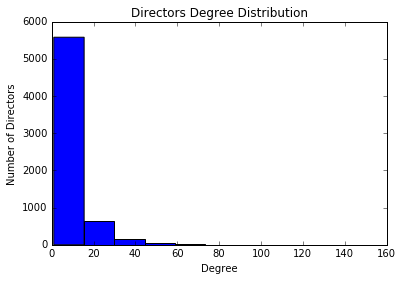

In [18]:
plt.hist(nx.degree(directors_network).values())
plt.title("Directors Degree Distribution")
plt.xlabel('Degree')
plt.ylabel('Number of Directors')
plt.show()

EXPLANATION

:)

In [20]:
directors_as_a_node_network = nx.Graph()

dir_act = defaultdict(set)

for title in main_movies:
    cur_movie_data = main_movies[title]
    cur_dir = cur_movie_data["director"]
    cur_cast = [cur_movie_data["actor1"], cur_movie_data["actor2"], cur_movie_data["actor3"],
                cur_movie_data["actor4"], cur_movie_data["actor5"], cur_movie_data["actor6"]]

    dir_act[cur_dir].update(cur_cast)

for dir1 in dir_act:
    cast1 = dir_act[dir1]
    for dir2 in dir_act:
        if dir1 != dir2:
            cast2 = dir_act[dir2]
            common = cast1.intersection(cast2)
            if len(common) > 0:
                for act in common:
                    # add edge between dir1 and dir2
                    directors_as_a_node_network.add_edge(dir1, dir2, weight =1)
                    
            common = []



            
dir_net_num_of_links = directors_as_a_node_network.number_of_edges()
print('Number of links: ' + str(dir_net_num_of_links))

num_of_nodes = directors_as_a_node_network.number_of_nodes()
print('Number of nodes: ' + str(num_of_nodes))


Number of links: 121251
Number of nodes: 1921


In [23]:
directors = nx.Graph()
for movie in main_movies:
    directors.add_node(main_movies[movie]["director"])
print len(directors)

1921


In [24]:
# Betweenness centrality for 'directors_as_a_node_network'
between_centrality = nx.betweenness_centrality(directors_as_a_node_network)

# Go through 'between_centrality' and add to two lists (names and values)
between_centrality_names = []
between_centrality_values = []
for i in between_centrality:
    between_centrality_names.append(i)
    between_centrality_values.append(between_centrality[i])
    
# Combining lists of names and values
between_centrality_list = zip(between_centrality_names, between_centrality_values)

# Sort by values
between_centrality_sorted = sorted(between_centrality_list, key=lambda tup: tup[1], reverse=True)

# Print the top 10
for ii in between_centrality_sorted[0:10]:
    print(ii[0] + ' with value of ' + str(ii[1]))

Woody Allen with value of 0.0187819014826
Ridley Scott with value of 0.0151728436898
Steven Spielberg with value of 0.0125917903898
Clint Eastwood with value of 0.0111515532796
Ron (I) Howard with value of 0.0105641215123
Oliver (I) Stone with value of 0.010556704873
Tony (I) Scott with value of 0.00922967454605
Barry (I) Levinson with value of 0.00885625115466
Walter (I) Hill with value of 0.00864140195794
Joel Schumacher with value of 0.00863278629818


In [25]:
# Eigenvector centrality 
eigenvector_centrality_in = nx.eigenvector_centrality(directors_as_a_node_network)

# Go through 'eigenvector centrality_in' and add to two lists (names and values)
eigenvector_centrality_in_names = []
eigenvector_centrality_in_values = []
for i in eigenvector_centrality_in:
    eigenvector_centrality_in_names.append(i)
    eigenvector_centrality_in_values.append(eigenvector_centrality_in[i])
    
# Combining lists of names and values
eigenvector_centrality_in_list = zip(eigenvector_centrality_in_names, eigenvector_centrality_in_values)

# Sort by values
eigenvector_centrality_in_sorted = sorted(eigenvector_centrality_in_list, key=lambda tup: tup[1], reverse=True)

# Print the top 5
for ii in eigenvector_centrality_in_sorted[0:20]:
    print(ii[0] + ' with value of ' + str(ii[1]))

Woody Allen with value of 0.0950294577375
Steven Spielberg with value of 0.0912651602567
Barry (I) Levinson with value of 0.0894931214361
Oliver (I) Stone with value of 0.0880117134816
Ron (I) Howard with value of 0.0870836666393
Ridley Scott with value of 0.0865413671453
Tony (I) Scott with value of 0.0833347931727
Clint Eastwood with value of 0.0819358447652
Joel Schumacher with value of 0.0816934582326
Martin (I) Scorsese with value of 0.0814357425669
Steven Soderbergh with value of 0.0787542127529
Michael (I) Bay with value of 0.0775885608277
Ethan Coen with value of 0.0765195862013
Spike Lee with value of 0.0734792483432
Robert Zemeckis with value of 0.0733179997185
Mike (I) Nichols with value of 0.0731948556936
Tim (I) Burton with value of 0.0714182947515
Ivan Reitman with value of 0.0710576774678
Rob Reiner with value of 0.070045195902
Walter (I) Hill with value of 0.06871236156


In [26]:
# Most profitable directors - we don't have directors ranking but we can calculate the most profitable one by adding their movie
# profits

directorProfi = defaultdict(float)
directorProfiRate = defaultdict(float)
for movie,val in main_movies.iteritems():
    directorProfi[val['director']] += (float(val['gross'])-float(val['budget']))
    directorProfiRate[val['director']] += (float(val['gross'])/float(val['budget']))

    
sorted_dir_rofit = sorted(directorProfi.items(), key=operator.itemgetter(1),reverse=True)
print "\nThe most profitable directors (what was their total gross): \n"
for item in sorted_dir_rofit[:20]:
    print item
sorted_dir_rofit_rate = sorted(directorProfiRate.items(), key=operator.itemgetter(1),reverse=True)
print "\nThe most profitable directors (how many times they multiply their movie budget):  \n"
for item in sorted_dir_rofit_rate[:20]:
    print item


The most profitable directors (what was their total gross): 

('James (I) Cameron', 5352523491.0)
('Steven Spielberg', 5300032117.0)
('Peter (I) Jackson', 5290495080.0)
('Michael (I) Bay', 4384075304.0)
('David (II) Yates', 3677840001.0)
('Chris Columbus', 3301930295.0)
('Christopher (I) Nolan', 3222483234.0)
('Carlos (I) Saldanha', 2682311307.0)
('Roland Emmerich', 2558370399.0)
('Tim (I) Burton', 2558049678.0)
('Gore Verbinski', 2548742008.0)
('J.J. Abrams', 2546319903.0)
('Francis (II) Lawrence', 2504026575.0)
('James (I) Wan', 2246699771.0)
('Sam Raimi', 2245112627.0)
('Robert Zemeckis', 2185318247.0)
('George (I) Lucas', 2182197773.0)
('Ron (I) Howard', 2175879421.0)
('Ridley Scott', 2166785893.0)
('Sam (I) Mendes', 2044100904.0)

The most profitable directors (how many times they multiply their movie budget):  

('James (I) Wan', 217.00915244692982)
('Jared (I) Hess', 115.29365)
('Chris Columbus', 100.08403395480676)
('Steven Spielberg', 90.69430998957387)
('Les Mayfield', 83.87

In [27]:
dir_act = defaultdict(set)

all_Act = set()

for title in main_movies:
    cur_movie_data = main_movies[title]
    cur_dir = cur_movie_data["director"]
    cur_cast = [cur_movie_data["actor1"], cur_movie_data["actor2"], cur_movie_data["actor3"],
                cur_movie_data["actor4"], cur_movie_data["actor5"], cur_movie_data["actor6"]]

    dir_act[cur_dir].update(cur_cast)
    all_Act.update(cur_cast)

for dir1 in dir_act:
    cast1 = dir_act[dir1]
    for dir2 in dir_act:
        if dir1 != dir2:
            cast2 = dir_act[dir2]
            common = cast1.intersection(cast2)
            if len(common) > 0:
                # print "------", dir1,"----", dir2
                for act in common:
                    # add edge between dir1 and dir2
                    pass
            common = []

actors_and_ranks = defaultdict(int)

for title in main_movies:
    actors_and_ranks[main_movies[title]["actor1"]] = main_movies[title]["actor1_rank"]
    actors_and_ranks[main_movies[title]["actor2"]] = main_movies[title]["actor2_rank"]
    actors_and_ranks[main_movies[title]["actor3"]] = main_movies[title]["actor3_rank"]
    actors_and_ranks[main_movies[title]["actor4"]] = main_movies[title]["actor4_rank"]
    actors_and_ranks[main_movies[title]["actor5"]] = main_movies[title]["actor5_rank"]
    actors_and_ranks[main_movies[title]["actor6"]] = main_movies[title]["actor6_rank"]

dir_actors_ranks = defaultdict(lambda: [])

for dir in dir_act:
    act_ranks = []
    for act in dir_act[dir]:
        act_ranks.append(int(actors_and_ranks[act]))
    dir_actors_ranks[dir] = act_ranks

directors_main = {}

for title in main_movies:
    director = main_movies[title]["director"]
    budget = int(main_movies[title]["budget"])
    gross = int(main_movies[title]["gross"])

    if director not in directors_main:
        directors_main[director] = {"name": director,
                                    "gross_all":[gross],
                                    "gross_mean": 0,
                                    "budget_all":[budget],
                                    "budget_mean": 0,
                                    "amount_of_movies":1,
                                    "mean_actors":0}
    else:
        directors_main[director]["gross_all"].append(gross)
        directors_main[director]["budget_all"].append(budget)
        directors_main[director]["amount_of_movies"] += 1


for dir in dir_actors_ranks:
    directors_main[dir]["mean_actors"] = np.mean(dir_actors_ranks[dir])
    directors_main[dir]["gross_mean"] = np.mean(directors_main[dir]["gross_all"])
    directors_main[dir]["budget_mean"] = np.mean(directors_main[dir]["budget_all"])
    # fucking numpy uses 32bit intigers...
    directors_main[dir].update({"gross_total": __builtins__.sum(directors_main[dir]["gross_all"])})
    directors_main[dir].update({"budget_total": __builtins__.sum(directors_main[dir]["budget_all"])})

In [28]:
from collections import defaultdict

actors_list = ["actor1", "actor2", "actor3", "actor4", "actor5", "actor6"]

# Add every genre which actor has been in
actors_genres = defaultdict(list)
for movie in main_movies:
    for actor in actors_list:
        actors_genres[main_movies[movie][actor]].append(main_movies[movie]["genre"])

In [29]:
from collections import Counter

# Add actors to the genre they appear most in
actors_top_genres = {}
for actor in actors_genres:
    count = Counter(actors_genres[actor])
    actors_top_genres[actor] = count.most_common(1)[0][0]

In [30]:
# Print the genres and how many actors they have
genres_num_of_actors = Counter(actors_top_genres.values())
for i in genres_num_of_actors:
    print(str(i) + ": " + str(genres_num_of_actors[i]))

Mystery: 23
Romance: 2
Sci-Fi: 3
Family: 3
Horror: 193
Thriller: 4
Crime: 151
Drama: 970
Fantasy: 9
Animation: 20
Music: 1
Adventure: 183
Action: 1345
Comedy: 1628
Documentary: 24
War: 2
Biography: 102


In [32]:
# Group actors to their specific genre
genres_actors = defaultdict(list)
for actor in actors_top_genres:
    genres_actors[actors_top_genres[actor]].append(actor)

In [34]:
# Create subgraphs in actors_network based on genre the actor is in
for genre in genres_actors:
    actors_network.subgraph(genres_actors[genre])

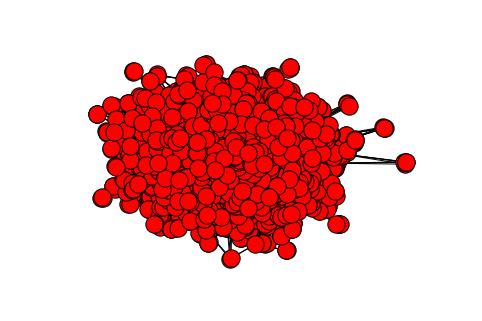

In [35]:
nx.draw(actors_network)